Not a tutorial! This notebook just generates the fake data used in some of the tutorials.

In [1]:
import pickle

from astropy.time import Time
import astropy.units as u
from astropy.table import QTable
import numpy as np
%matplotlib inline

from twobody import KeplerOrbit, PolynomialRVTrend
from thejoker import RVData

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
rnd = np.random.default_rng(seed=123)

# Binary

In [3]:
n_data = 256

t0 = Time('2019-1-1') + rnd.uniform(0., 40) * u.day

truth1 = dict()
truth1['P'] = rnd.uniform(40, 80) * u.day
truth1['M0'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['omega'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['e'] = 0.1 * u.one
truth1['K'] = rnd.uniform(5, 15) * u.km/u.s
truth1['v0'] = rnd.uniform(-50, 50) * u.km/u.s

orbit = KeplerOrbit(P=truth1['P'], e=truth1['e'], omega=truth1['omega'],
                    M0=truth1['M0'], t0=t0, K=truth1['K'],
                    i=90*u.deg, Omega=0*u.deg,  # these don't matter
                    barycenter=PolynomialRVTrend([truth1['v0']]))

t = t0 + truth1['P'] * np.concatenate(([0], np.sort(rnd.uniform(0, 3., n_data))))

rv = orbit.radial_velocity(t)
err = 10 ** rnd.uniform(-1, 0.5, size=len(rv)) * u.km/u.s
data = RVData(t, rv, rv_err=err)

In [4]:
tbl = QTable()
tbl['bjd'] = data.t.tcb.jd
tbl['rv'] = data.rv
tbl['rv_err'] = data.rv_err
tbl.meta['t_ref'] = data.t_ref
tbl.write('data.ecsv', overwrite=True)

In [5]:
with open('true-orbit.pkl', 'wb') as f:
    pickle.dump(truth1, f)

# Triple

In [6]:
n_data = 256

t0 = Time('2019-1-1') + rnd.uniform(0., 40) * u.day

truth1 = dict()
truth1['P'] = rnd.uniform(40, 80) * u.day
truth1['M0'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['omega'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['e'] = 0.25 * u.one
truth1['K'] = rnd.uniform(5, 15) * u.km/u.s
truth1['v0'] = rnd.uniform(-50, 50) * u.km/u.s

orbit = KeplerOrbit(P=truth1['P'], e=truth1['e'], omega=truth1['omega'],
                    M0=truth1['M0'], t0=t0, K=truth1['K'],
                    i=90*u.deg, Omega=0*u.deg,  # these don't matter
                    barycenter=PolynomialRVTrend([truth1['v0']]))

with open('true-orbit-triple.pkl', 'wb') as f:
    pickle.dump(truth1, f)

truth2 = dict()
truth2['P'] = 10 * rnd.uniform(40, 80) * u.day
truth2['M0'] = rnd.uniform(0., 2*np.pi) * u.radian
truth2['omega'] = rnd.uniform(0., 2*np.pi) * u.radian
truth2['e'] = 0.1
truth2['K'] = 13 * u.km/u.s

orbit2 = KeplerOrbit(P=truth2['P'], e=truth2['e'], omega=truth2['omega'],
                     M0=truth2['M0'], t0=t0, K=truth2['K'],
                     i=90*u.deg, Omega=0*u.deg)

t = t0 + truth1['P'] * np.concatenate(([0], np.sort(rnd.uniform(0, 5., n_data))))

rv = orbit.radial_velocity(t) + orbit2.radial_velocity(t)
err = 10**rnd.uniform(-1, 0.5, size=len(rv)) * u.km/u.s
data = RVData(t, rv, rv_err=err)

tbl = QTable()
tbl['bjd'] = data.t.tcb.jd
tbl['rv'] = data.rv
tbl['rv_err'] = data.rv_err
tbl.write('data-triple.ecsv', overwrite=True)

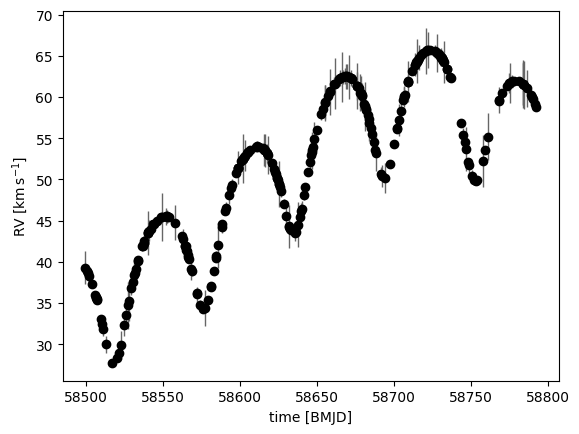

In [7]:
_ = data.plot()

# Multiple surveys:

In [8]:
n_data = 16

t0 = Time('2019-1-1') + rnd.uniform(0., 40) * u.day

truth1 = dict()
truth1['P'] = rnd.uniform(40, 80) * u.day
truth1['M0'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['omega'] = rnd.uniform(0., 2*np.pi) * u.radian
truth1['e'] = 0.13 * u.one
truth1['K'] = rnd.uniform(5, 15) * u.km/u.s
truth1['v0'] = rnd.uniform(-50, 50) * u.km/u.s

orbit = KeplerOrbit(P=truth1['P'], e=truth1['e'], omega=truth1['omega'],
                    M0=truth1['M0'], t0=t0, K=truth1['K'],
                    i=90*u.deg, Omega=0*u.deg,  # these don't matter
                    barycenter=PolynomialRVTrend([truth1['v0']]))

t = t0 + truth1['P'] * np.concatenate(([0], np.sort(rnd.uniform(0, 3., n_data))))

rv = orbit.radial_velocity(t)
err = 10**rnd.uniform(-1, 0.5, size=len(rv)) * u.km/u.s

data1 = RVData(t[:10], rv[:10], rv_err=err[:10])

rv[10:] += 4.8 * u.km/u.s
data2 = RVData(t[10:], rv[10:], rv_err=err[10:])

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

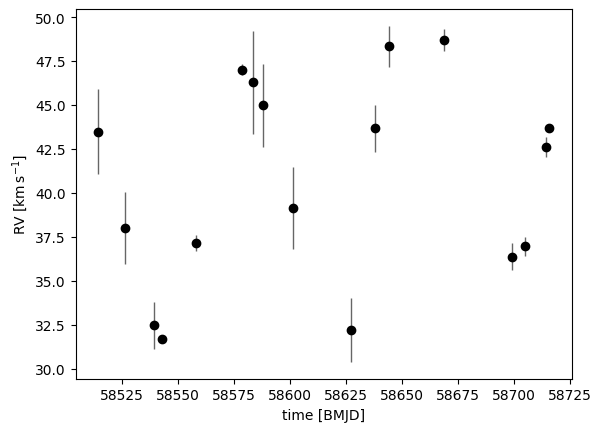

In [10]:
fig, ax = plt.subplots()
_ = data1.plot(ax=ax)
_ = data2.plot(ax=ax)

In [11]:
for i, data in enumerate([data1, data2]):
    tbl = QTable()
    tbl['bjd'] = data.t.tcb.jd
    tbl['rv'] = data.rv
    tbl['rv_err'] = data.rv_err
    tbl.meta['t_ref'] = data1.t0
    tbl.write(f'data-survey{i+1}.ecsv', overwrite=True)

/home/circleci/project/thejoker/data.py:124: TheJokerDeprecationWarning: The argument and attribute "t0" has been renamed and should now be specified / accessed as "t_ref"
  warnings.warn('The argument and attribute "t0" has been renamed '
